In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gender Predictor

## Get Last x words

In [28]:
def getLastWords(name, x):
    return name[x*-1:]

## Verify if x finishes with a,e,i,o,u,y

In [29]:
def FinishesWithAEIOUY(name):
    result = 0
    if getLastWords(name,1).lower() in ['a','e','i','o','u','y']:
        result = 1
    return result

In [30]:
trained = pd.read_csv(r'C:\git\SexPredictor\NameBayes.Client\trained.txt', sep=";", header=None)
trained.columns=['id','name','gender']
trained

,id,name,gender
0,1,rafael,H
1,2,roberta,M
2,3,marcio,H
3,4,caio,H
4,6,alexandre,H
5,9,fabio,H
6,20,roger,H
7,24,jorge,H
8,29,amanda,M
9,30,joao,H


## Gender description

In [139]:
trained['gender'].describe()

count     1863
unique       2
top          M
freq       935
Name: gender, dtype: object

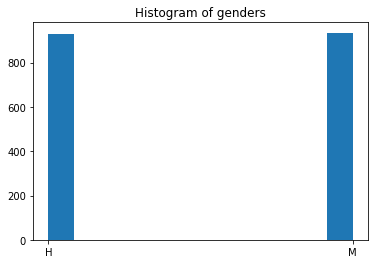

In [140]:
plt.hist(list(trained['gender']), bins='auto')
>>> plt.title("Histogram of genders")
>>> plt.show()

## Building the input data

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bag_of_words = count_vect.fit_transform([getLastWords(name,3) for name in trained['name']])
X_train = pd.DataFrame(bag_of_words.toarray(), columns=count_vect.get_feature_names())

In [209]:
X_train['FinishesWithAEIOUY'] = [FinishesWithAEIOUY(name) for name in trained['name']]

In [211]:
Y_train = np.array(trained['gender'])

In [255]:
def getNameTransform(name):
    result = pd.DataFrame(count_vect.transform([getLastWords(name,3)]).toarray(), columns=count_vect.get_feature_names()) 
    result['FinishesWithAEIOUY'] = [FinishesWithAEIOUY(name)]
    return result

## Loading Test data

In [276]:
tests = pd.read_csv(r'C:\git\SexPredictor\NameBayes.Client\test.txt', sep=";", header=None)
tests.columns=['name','gender']
X_test = pd.DataFrame(count_vect.transform([getLastWords(name,3) for name in tests['name']]).toarray(), columns=count_vect.get_feature_names())
X_test['FinishesWithAEIOUY'] = [FinishesWithAEIOUY(name) for name in tests['name']]

In [278]:
Y_test = np.array(tests['gender'])

# Predicting

## Naive Bayes

In [256]:
from sklearn.naive_bayes import GaussianNB

In [257]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None)

In [277]:
clf.predict(getNameTransform('Leonardo'))

array(['H'], dtype='<U1')

In [279]:
clf.score(X_test,Y_test)

0.9230769230769231

## Logistic Regression

In [287]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)

In [288]:
clf.score(X_test,Y_test)

0.9615384615384616

## SVM

In [328]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [329]:
# clf.fit(X_train, [1 if x=='H' else 0 for x in Y_train])
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [330]:
clf.score(X_test,Y_test)

0.9769230769230769

In [332]:
Y_pred = clf.predict(X_test)

## Confusion Matrix of SVM results

In [333]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))

[[66  2]
 [ 1 61]]
             precision    recall  f1-score   support

          H       0.99      0.97      0.98        68
          M       0.97      0.98      0.98        62

avg / total       0.98      0.98      0.98       130



In [366]:
for x in range(len(Y_test)):
        if Y_test[x] != Y_pred[x]:
            print(tests['name'][x])
    

Iva
Jose
Ketlin


In [370]:
clf.predict(getNameTransform('Ivã'))

array(['H'], dtype=object)

In [368]:
clf.predict(getNameTransform('Jose'))

array(['M'], dtype=object)

In [369]:
clf.predict(getNameTransform('Ketlin'))

array(['H'], dtype=object)